In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
data1 =pd.read_excel('Data/Table 1. Retail turnover, by industry group 850101.xlsx',sheet_name="Data1")
data1 = data1.drop(range(0,9))
data1 = data1.rename(columns = {'Unnamed: 0':'Month'})
data1.head()
# 6 Different Indsutries in this Dataframe, SEASONALLY ADJUSTED IS MOST ACCURATE

,Month,Turnover ; Total (State) ; Food retailing ;,Turnover ; Total (State) ; Household goods retailing ;,"Turnover ; Total (State) ; Clothing, footwear and personal accessory retailing ;",Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;,Turnover ; Total (State) ; Food retailing ;.1,Turnover ; Total (State) ; Household goods retailing ;.1,...,Turnover ; Total (State) ; Other retailing ;.1,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;.1",Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; Total (State) ; Food retailing ;.2,Turnover ; Total (State) ; Household goods retailing ;.2,"Turnover ; Total (State) ; Clothing, footwear and personal accessory retailing ;.2",Turnover ; Total (State) ; Department stores ;.2,Turnover ; Total (State) ; Other retailing ;.2,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;.2",Turnover ; Total (State) ; Total (Industry) ;.2
9,1982-04-01 00:00:00,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.2,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.6,482.4,505.1,347.6,3523.4
10,1982-05-01 00:00:00,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.6,...,502.3,346.3,3527.6,1181.7,654.1,361.9,484.2,504.9,346.3,3533.6
11,1982-06-01 00:00:00,1160,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.8,...,506.9,350.8,3561.5,1192.7,655.7,361.9,486.4,504.7,345.9,3547
12,1982-07-01 00:00:00,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.5,...,503.6,341.5,3553.9,1203.2,656.6,361.7,488.6,505.3,345.5,3560.6
13,1982-08-01 00:00:00,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.9,659.7,...,505.9,342.7,3581.8,1213.6,656.5,362,489.8,505.6,346.4,3573.6


In [4]:
data_by_state =pd.read_excel('Data/Table 3. Retail turnover, by state 850103.xlsx',sheet_name="Data1")
data_by_state = data_by_state.drop(range(0,9))
data_by_state = data_by_state.rename(columns = {'Unnamed: 0':'Month'})
data_by_state.head()
data_by_state.columns

Index(['Month', 'Turnover ;  New South Wales ;  Total (Industry) ;',
       'Turnover ;  Victoria ;  Total (Industry) ;',
       'Turnover ;  Queensland ;  Total (Industry) ;',
       'Turnover ;  South Australia ;  Total (Industry) ;',
       'Turnover ;  Western Australia ;  Total (Industry) ;',
       'Turnover ;  Tasmania ;  Total (Industry) ;',
       'Turnover ;  Northern Territory ;  Total (Industry) ;',
       'Turnover ;  Australian Capital Territory ;  Total (Industry) ;',
       'Turnover ;  Total (State) ;  Total (Industry) ;',
       'Turnover ;  New South Wales ;  Total (Industry) ;.1',
       'Turnover ;  Victoria ;  Total (Industry) ;.1',
       'Turnover ;  Queensland ;  Total (Industry) ;.1',
       'Turnover ;  South Australia ;  Total (Industry) ;.1',
       'Turnover ;  Western Australia ;  Total (Industry) ;.1',
       'Turnover ;  Tasmania ;  Total (Industry) ;.1',
       'Turnover ;  Northern Territory ;  Total (Industry) ;.1',
       'Turnover ;  Australian Cap

In [5]:
data_by_state_and_industry =pd.read_excel('Data/Table 12. Retail turnover, state by industry subgroup, seasonally adjusted.xlsx',sheet_name="Data1")
data_by_state_and_industry = data_by_state_and_industry.drop(range(0,9))
data_by_state_and_industry = data_by_state_and_industry.rename(columns = {'Unnamed: 0':'Month'})
data_by_state_and_industry.columns
data_by_state_and_industry.head()

,Month,Turnover ; New South Wales ; Supermarket and grocery stores ;,Turnover ; New South Wales ; Liquor retailing ;,Turnover ; New South Wales ; Other specialised food retailing ;,Turnover ; New South Wales ; Food retailing ;,"Turnover ; New South Wales ; Furniture, floor coverings, houseware and textile goods retailing ;",Turnover ; New South Wales ; Electrical and electronic goods retailing ;,"Turnover ; New South Wales ; Hardware, building and garden supplies retailing ;",Turnover ; New South Wales ; Household goods retailing ;,Turnover ; New South Wales ; Clothing retailing ;,...,Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Newspaper and book retailing ;,Turnover ; Total (State) ; Other recreational goods retailing ;,"Turnover ; Total (State) ; Pharmaceutical, cosmetic and toiletry goods retailing ;",Turnover ; Total (State) ; Other retailing n.e.c. ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and catering services ;",Turnover ; Total (State) ; Takeaway food services ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;
9,1982-04-01 00:00:00,307.1,43.6,65,415.7,68.9,105.8,62.1,236.8,95.5,...,479.7,143.9,68.1,132.3,163.5,507.9,148.4,201.4,349.8,3518.7
10,1982-05-01 00:00:00,307.4,44.7,65.1,417.2,66,104.9,61.6,232.5,95.8,...,489.2,141.1,67.9,131.4,161.9,502.3,146.9,199.5,346.3,3527.6
11,1982-06-01 00:00:00,308.9,44.4,64.7,418,66.8,107.4,63.4,237.6,96,...,479.2,140.7,68.9,131,166.4,506.9,147.8,203,350.8,3561.5
12,1982-07-01 00:00:00,309.3,44.6,65.6,419.6,66,104.2,65.6,235.7,96,...,476.5,136.3,68.4,135.1,163.8,503.6,146,195.6,341.5,3553.9
13,1982-08-01 00:00:00,310.7,44.9,64.4,420,65.9,104.5,64.4,234.9,94.4,...,515.2,138,68.3,135.6,164,505.9,144,198.7,342.7,3581.8


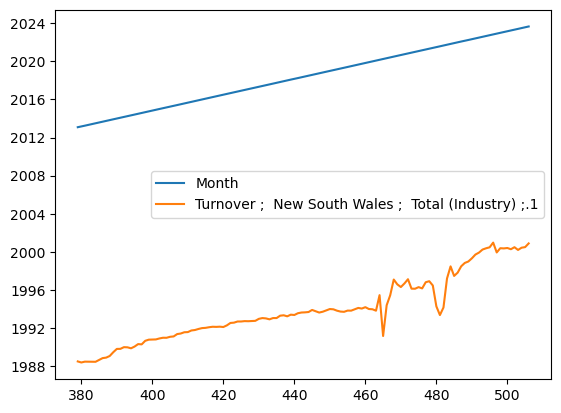

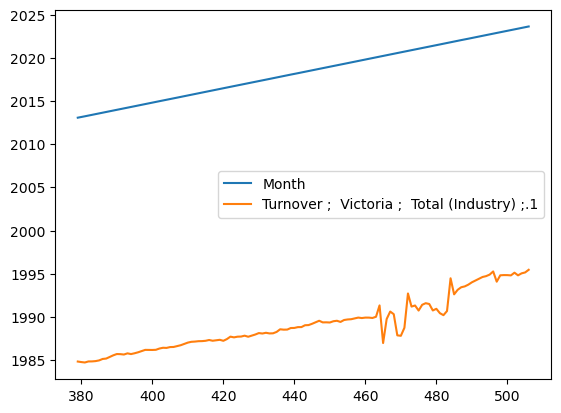

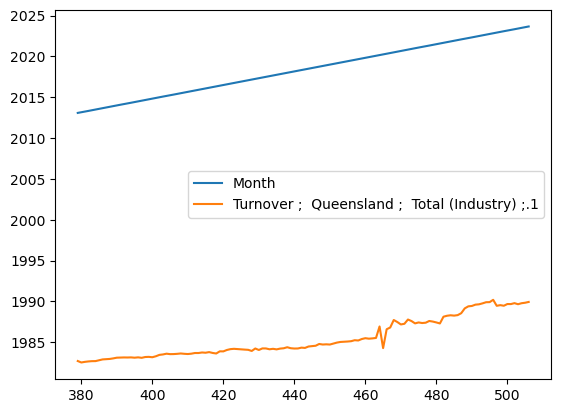

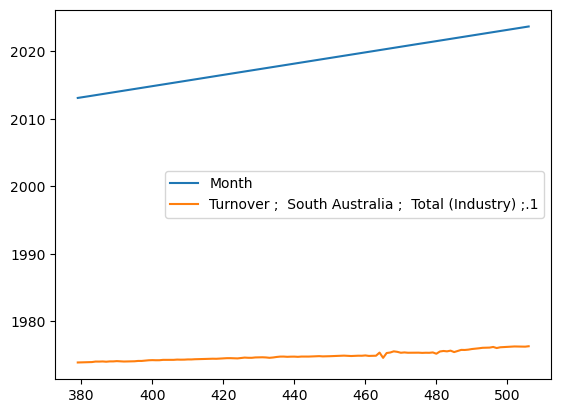

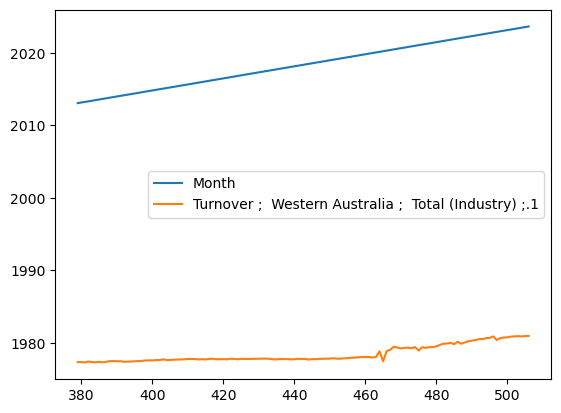

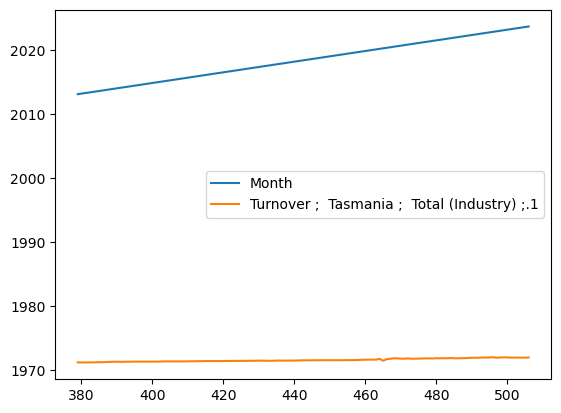

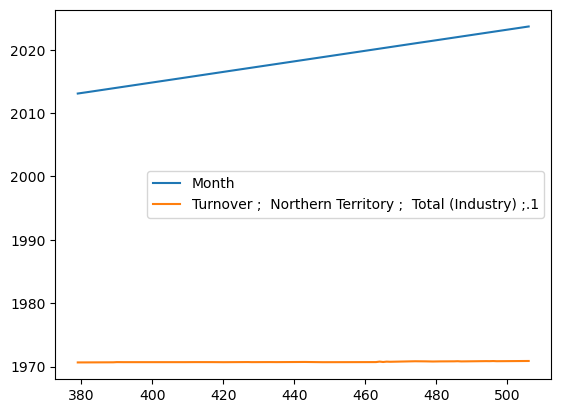

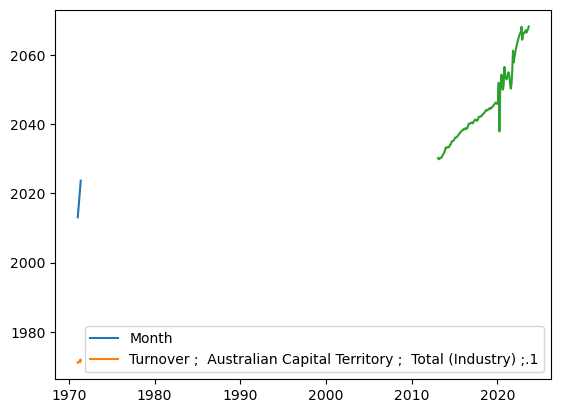

In [6]:
data_by_state_Q1data = data_by_state.drop(range(9, 379))
#data_by_state_Q1data["Month"]= pd.to_datetime(data_by_state_Q1data["Month"]) 

data_by_state_Q1data_seasonal= data_by_state_Q1data.loc[: , ['Month', 
                                                             'Turnover ;  New South Wales ;  Total (Industry) ;.1',
                                                             'Turnover ;  Victoria ;  Total (Industry) ;.1',
                                                             'Turnover ;  Queensland ;  Total (Industry) ;.1',
                                                             'Turnover ;  South Australia ;  Total (Industry) ;.1',
                                                             'Turnover ;  Western Australia ;  Total (Industry) ;.1',
                                                             'Turnover ;  Tasmania ;  Total (Industry) ;.1',
                                                             'Turnover ;  Northern Territory ;  Total (Industry) ;.1',
                                                             'Turnover ;  Australian Capital Territory ;  Total (Industry) ;.1',
                                                             'Turnover ;  Total (State) ;  Total (Industry) ;.1']]
data_by_state_Q1data_seasonal["Month"] = pd.to_datetime(data_by_state_Q1data_seasonal["Month"]) 
data_by_state_Q1data_seasonal.set_index("Month")
NSW=data_by_state_Q1data_seasonal.iloc[:, [0, 1]]
firstlineplot = NSW.plot.line()
VIC = data_by_state_Q1data_seasonal.iloc[:, [0, 2]]
secondplotline = VIC.plot.line()
Queensland = data_by_state_Q1data_seasonal.iloc[:, [0, 3]]
thirdplotline = Queensland.plot.line()
SA = data_by_state_Q1data_seasonal.iloc[:, [0, 4]]
fourthplotline = SA.plot.line()
WA = data_by_state_Q1data_seasonal.iloc[:, [0, 5]]
fivethplotline = WA.plot.line()
Tas = data_by_state_Q1data_seasonal.iloc[:, [0, 6]]
sixthplotline = Tas.plot.line()
NT = data_by_state_Q1data_seasonal.iloc[:, [0, 7]]
sixthplotline = NT.plot.line()
ACT = data_by_state_Q1data_seasonal.iloc[:, [0, 8]]
sixthplotline = ACT.plot.line()
tot = data_by_state_Q1data_seasonal.iloc[:, [0, 9]]
xaxis = data_by_state_Q1data_seasonal.iloc[:, 0].to_xarray()
yaxis = data_by_state_Q1data_seasonal.iloc[:, 9].to_xarray()
seventhplotline = plt.plot(xaxis, yaxis)
plt.legend = 'Upper Left'
plt.show()
firstlineplot
secondplotline
thirdplotline
fourthplotline
fivethplotline
sixthplotline
seventhplotline

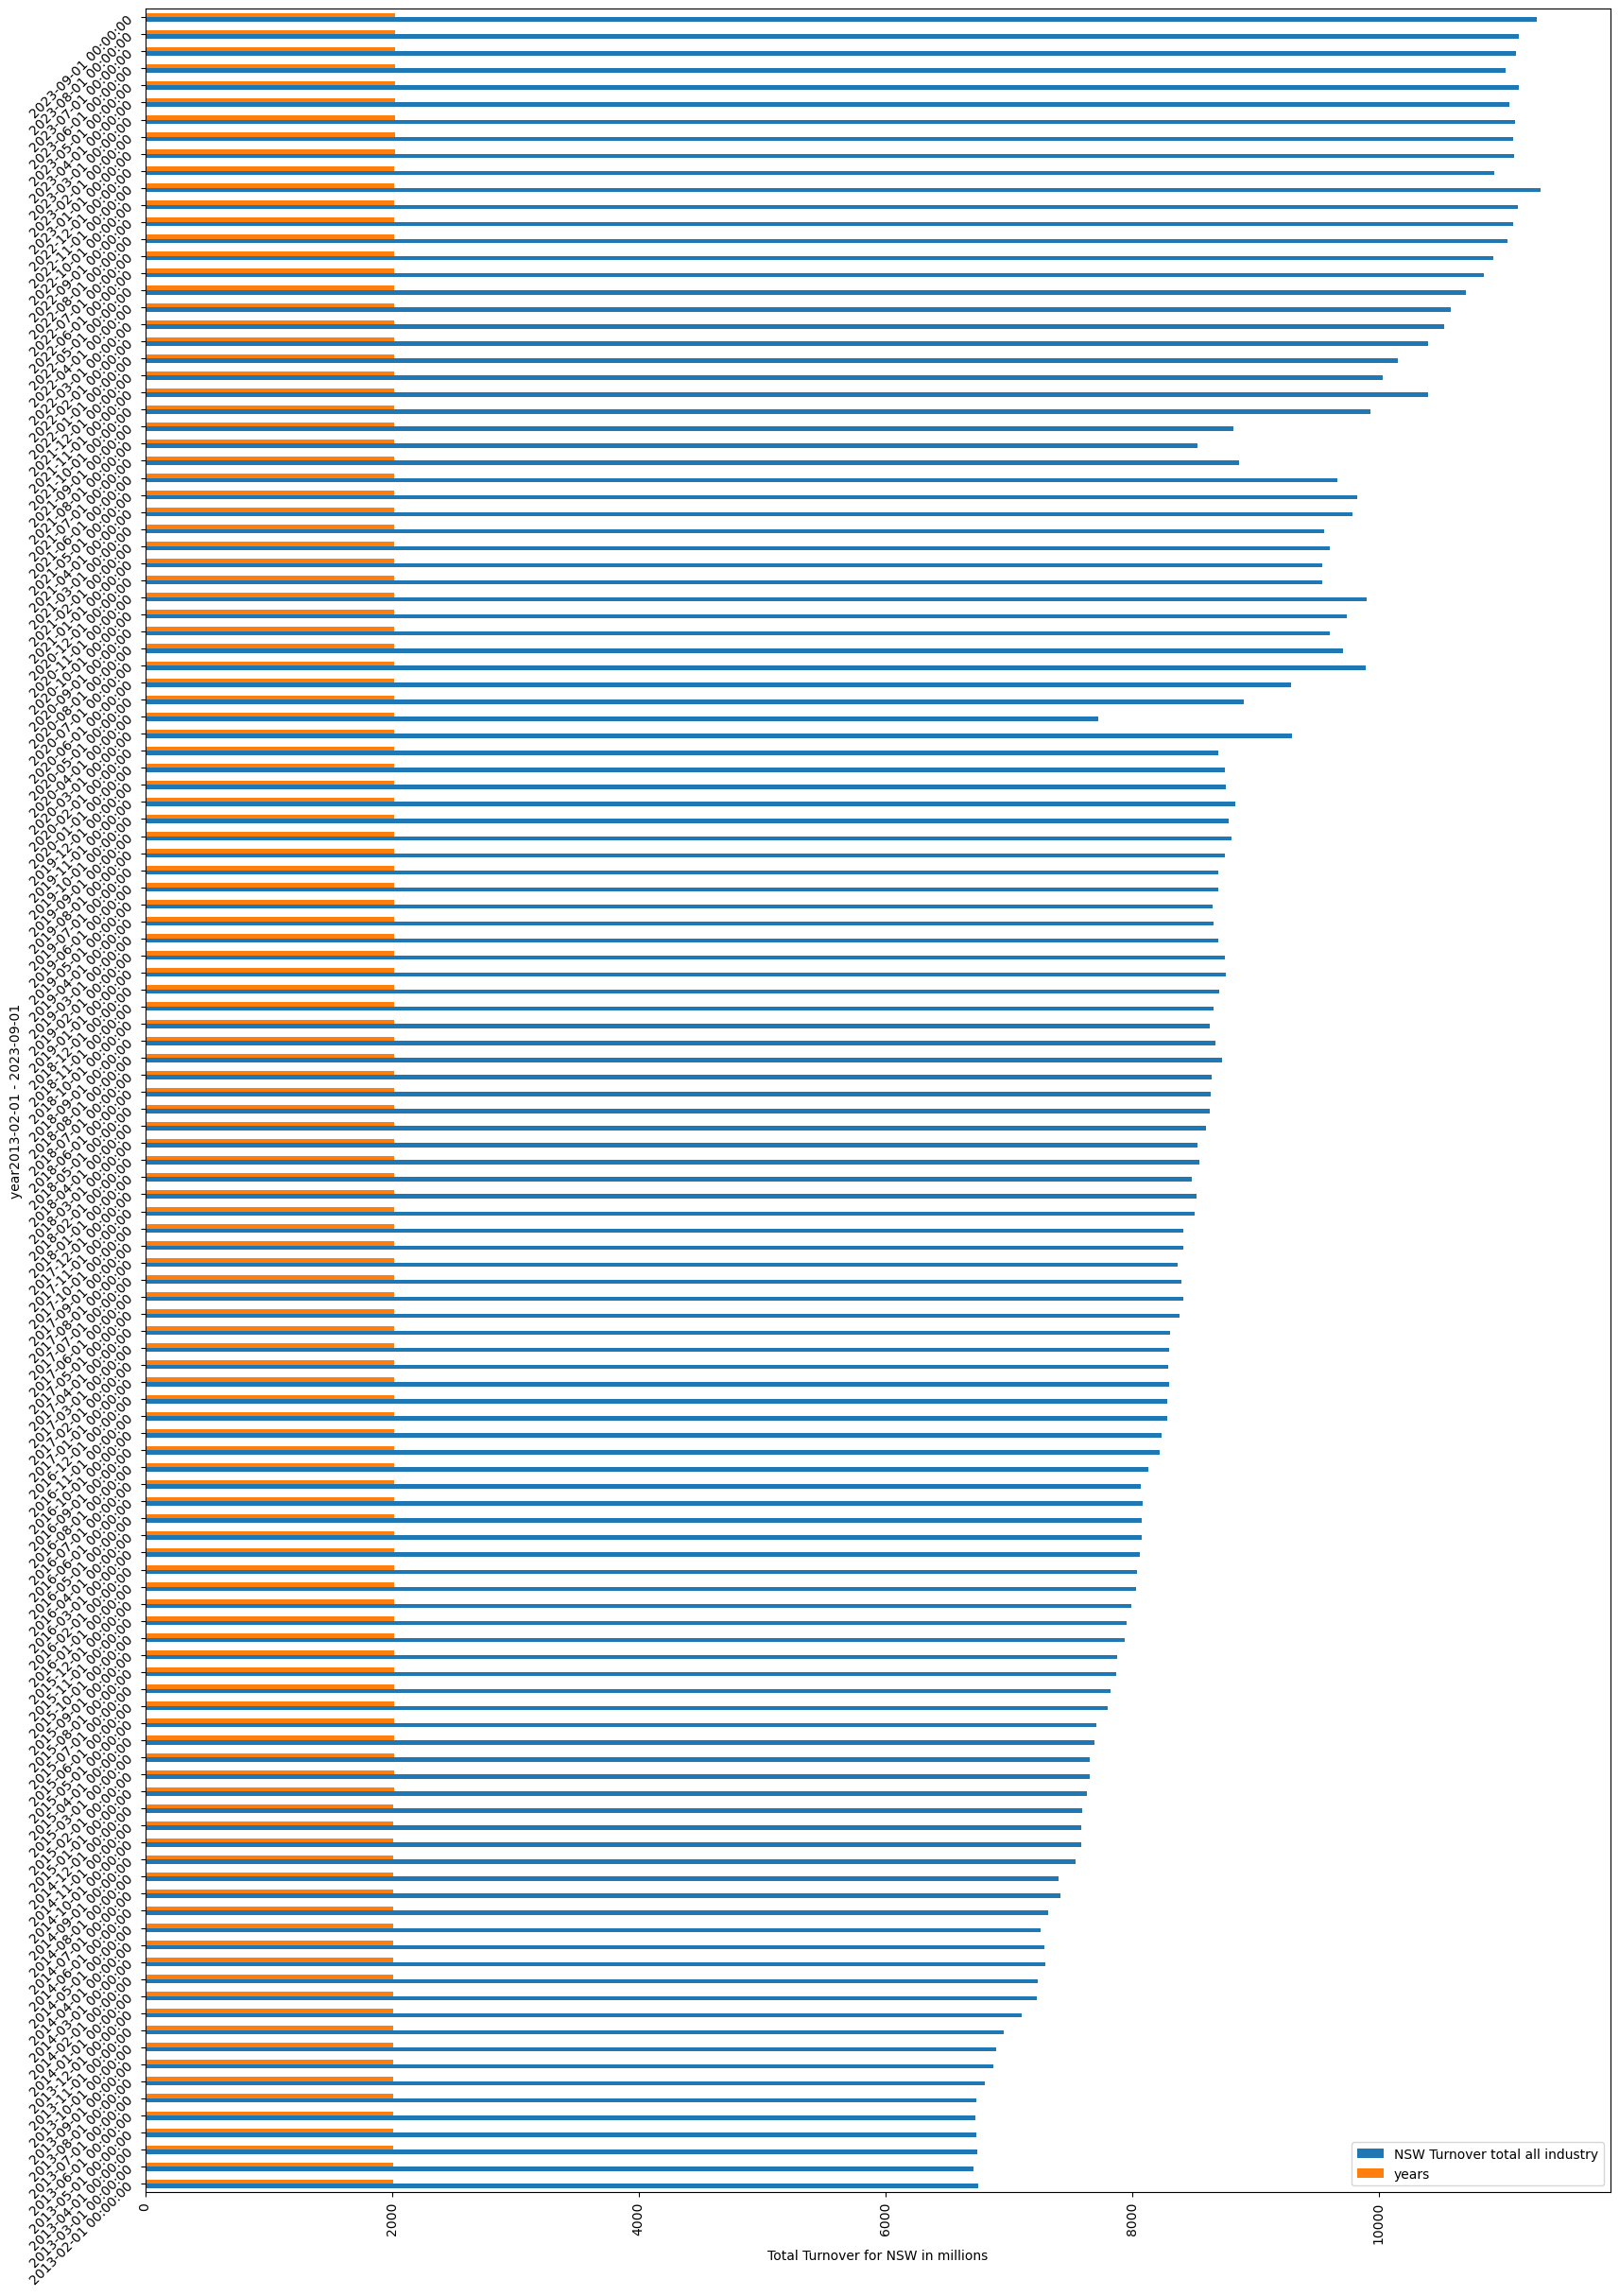

lowest turnover in years NSW Turnover total all industry    6711.6
years                                2013
dtype: object
highest turnover in years NSW Turnover total all industry    11309.8
years                                 2023
dtype: object


In [74]:
strdates = (pd.to_datetime(data_by_state_Q1data_seasonal.Month)).to_list()
idx = pd.Categorical(strdates, ordered = True)
Year_month = pd.to_datetime(data_by_state_Q1data_seasonal.Month).dt.year.array
year = pd.Series({"Seasonal yearly date":Year_month},index = idx)

yaxis = data_by_state_Q1data_seasonal['Turnover ;  New South Wales ;  Total (Industry) ;.1'].array
yaxis
new_NSW_Turnover_df = pd.DataFrame({"NSW Turnover total all industry": yaxis, "years":Year_month},index = idx)
lowestturnover_year = new_NSW_Turnover_df.min()
highestturnover_year = new_NSW_Turnover_df.max()
ax = new_NSW_Turnover_df.plot.barh(rot = 45, figsize = (20, 30))
ax.set(ylabel  = "year2013-02-01 - 2023-09-01")
ax.set(xlabel = "Total Turnover for NSW in millions")
ax.tick_params(axis = 'x', rotation = 90)
plt.show()
print(f"lowest turnover in years {lowestturnover_year}")
print(f"highest turnover in years {highestturnover_year}")


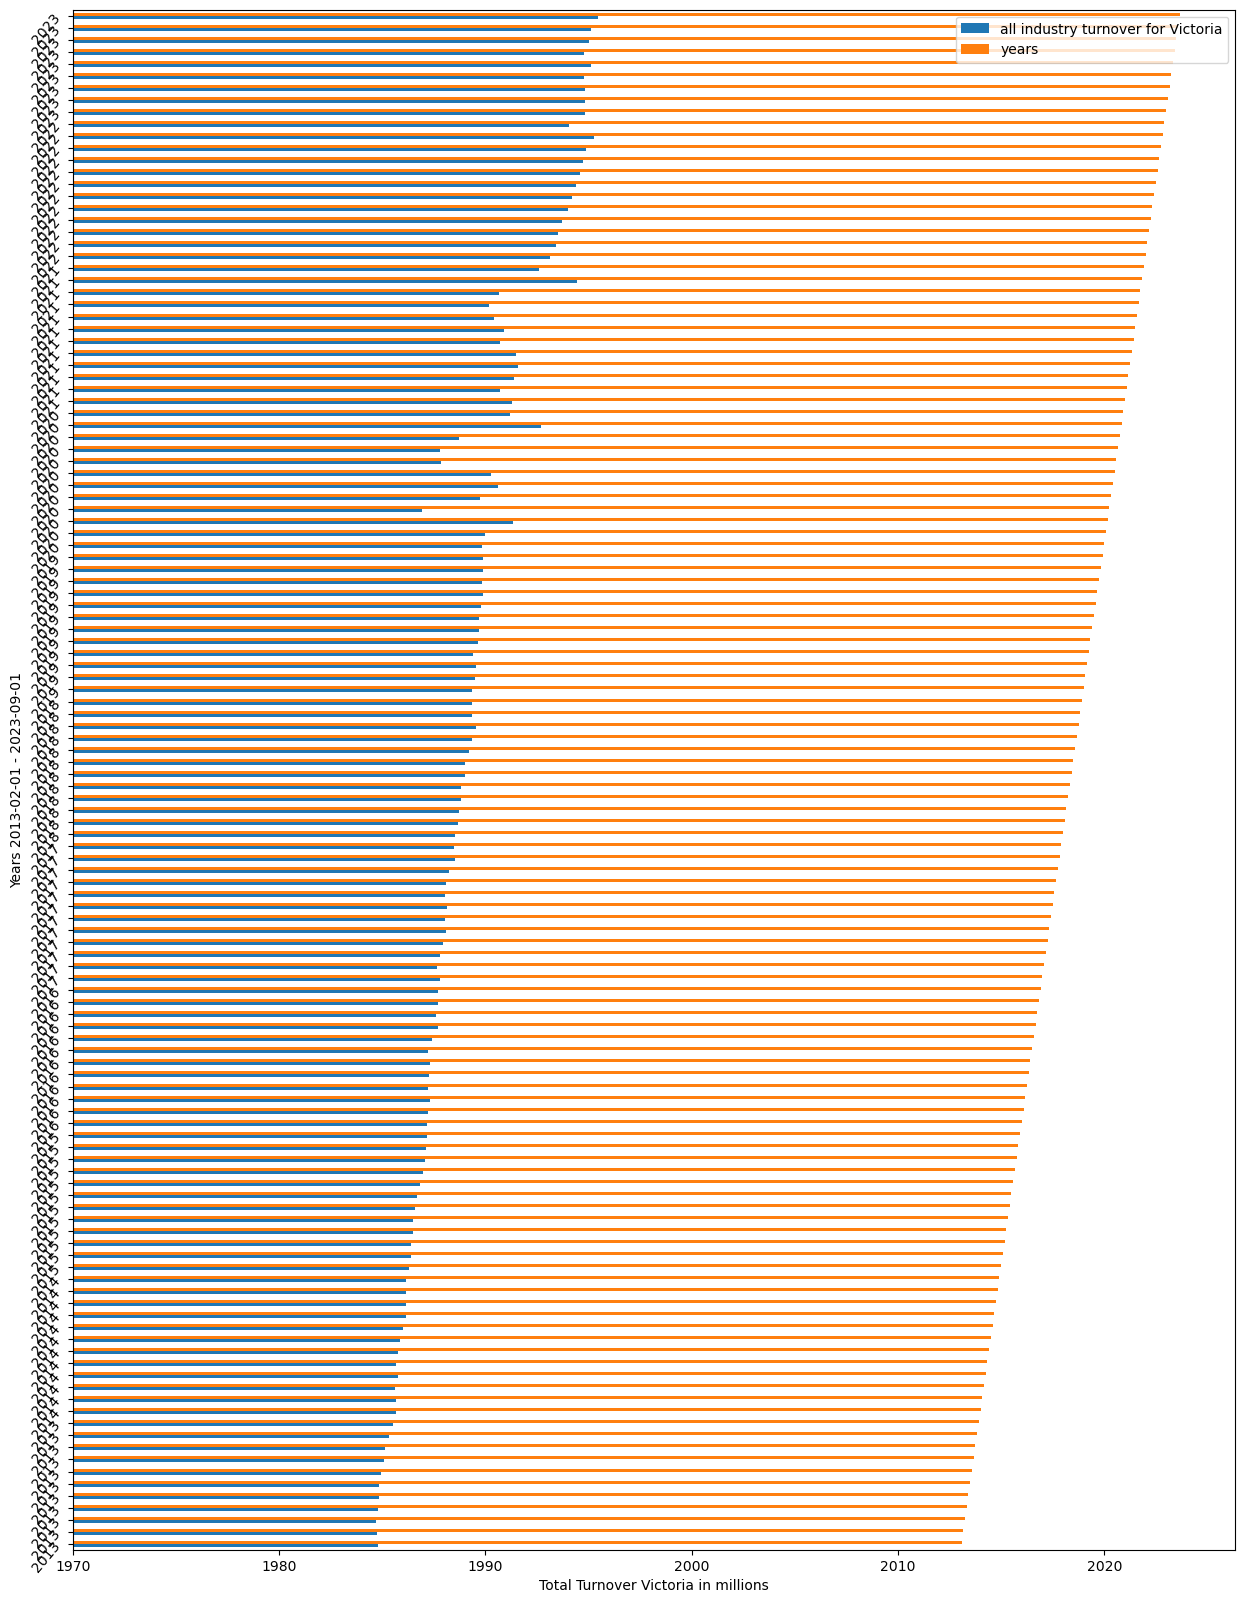

lowest turnover in years in all industry turnover for Victoria                 5366.3
years                                 2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for Victoria                 9292.9
years                                 2023-09-01 00:00:00
dtype: object


In [81]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Victoria ;  Total (Industry) ;.1'].array
yaxis
year_vic = data_by_state_Q1data_seasonal["Month"].array
Victoria_turnover_df= pd.DataFrame({"all industry turnover for Victoria":yaxis, "years":year_vic}, index = Year_month)
lowestturnover_victoria = Victoria_turnover_df.min()
highestturnover_victoria = Victoria_turnover_df.max()
ax = Victoria_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover Victoria in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_victoria}")
print(f"highest turnover in years in {highestturnover_victoria}")

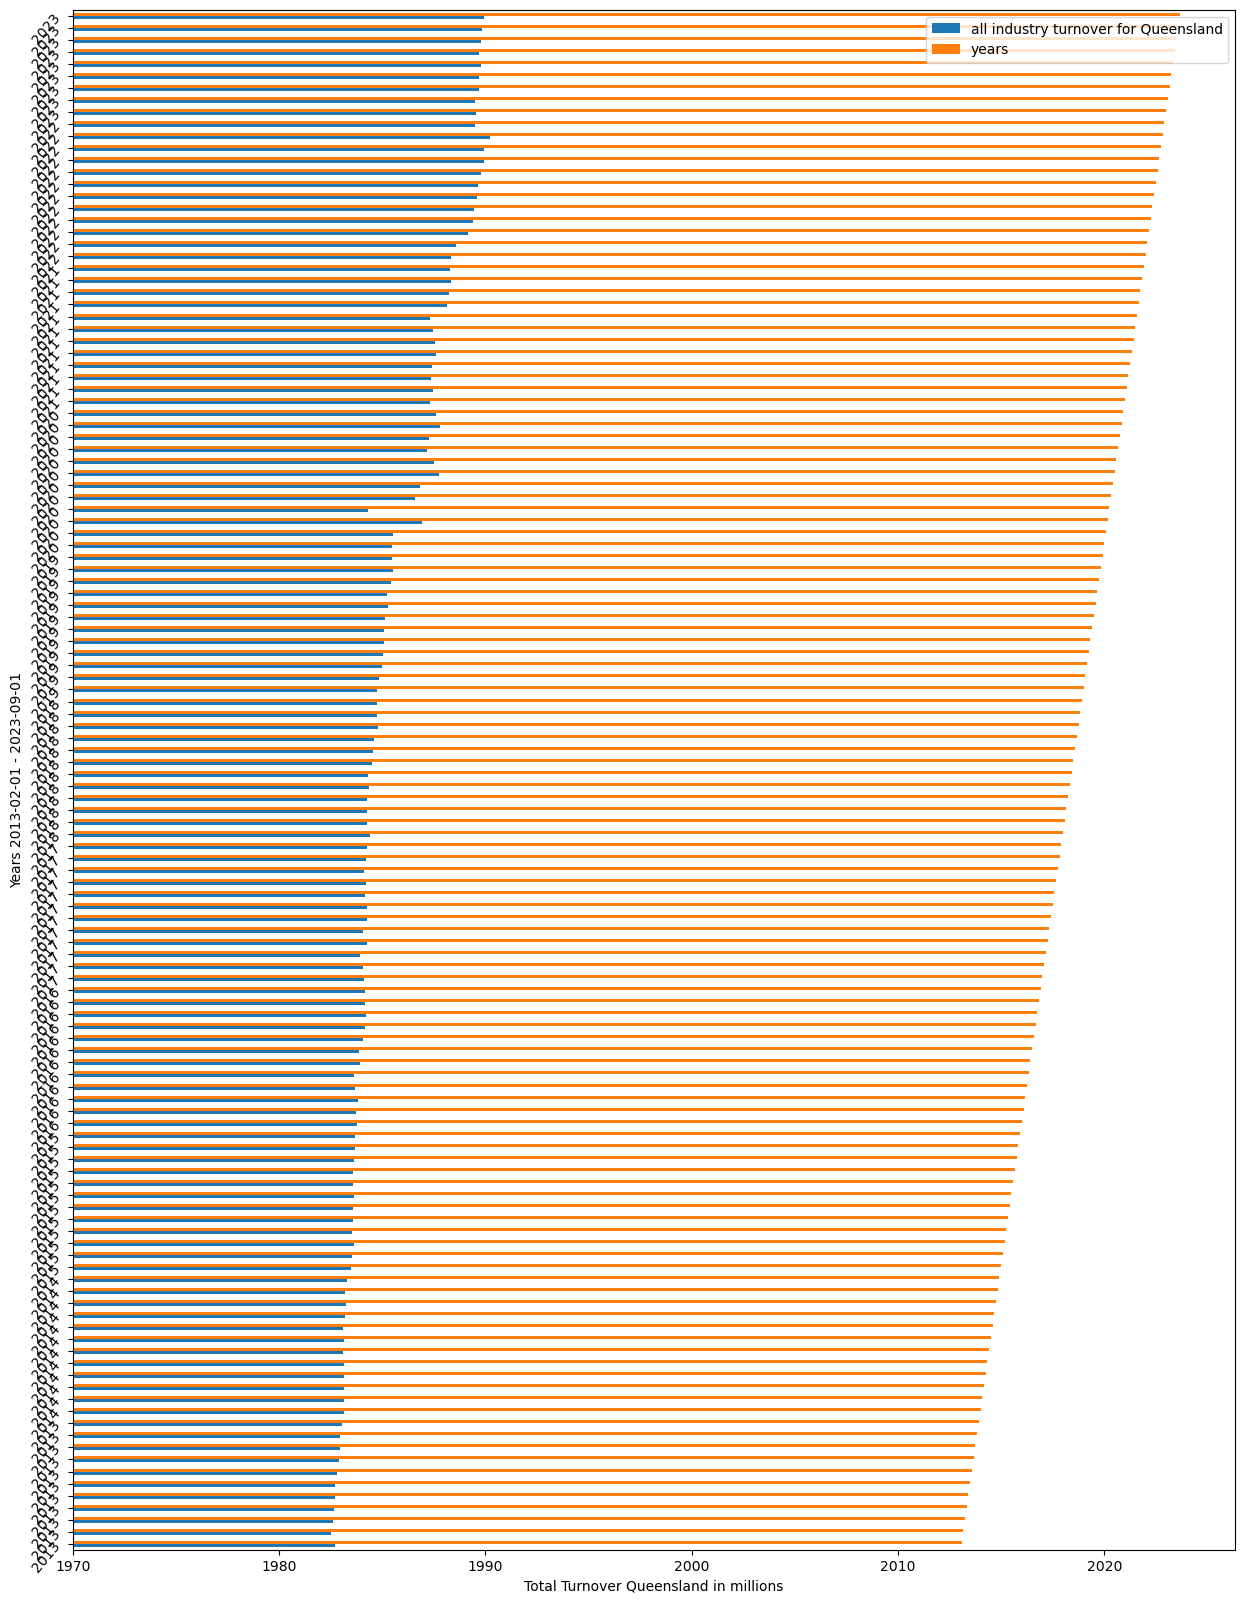

lowest turnover in years in all industry turnover for Queensland                 4578.2
years                                   2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for Queensland                 7379.6
years                                   2023-09-01 00:00:00
dtype: object


In [82]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Queensland ;  Total (Industry) ;.1'].array
yaxis
year_Qld = data_by_state_Q1data_seasonal["Month"].array
Queensland_turnover_df= pd.DataFrame({"all industry turnover for Queensland":yaxis, "years":year_Qld}, index = Year_month)
lowestturnover_Queensland = Queensland_turnover_df.min()
highestturnover_Queensland = Queensland_turnover_df.max()
ax = Queensland_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover Queensland in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_Queensland}")
print(f"highest turnover in years in {highestturnover_Queensland}")

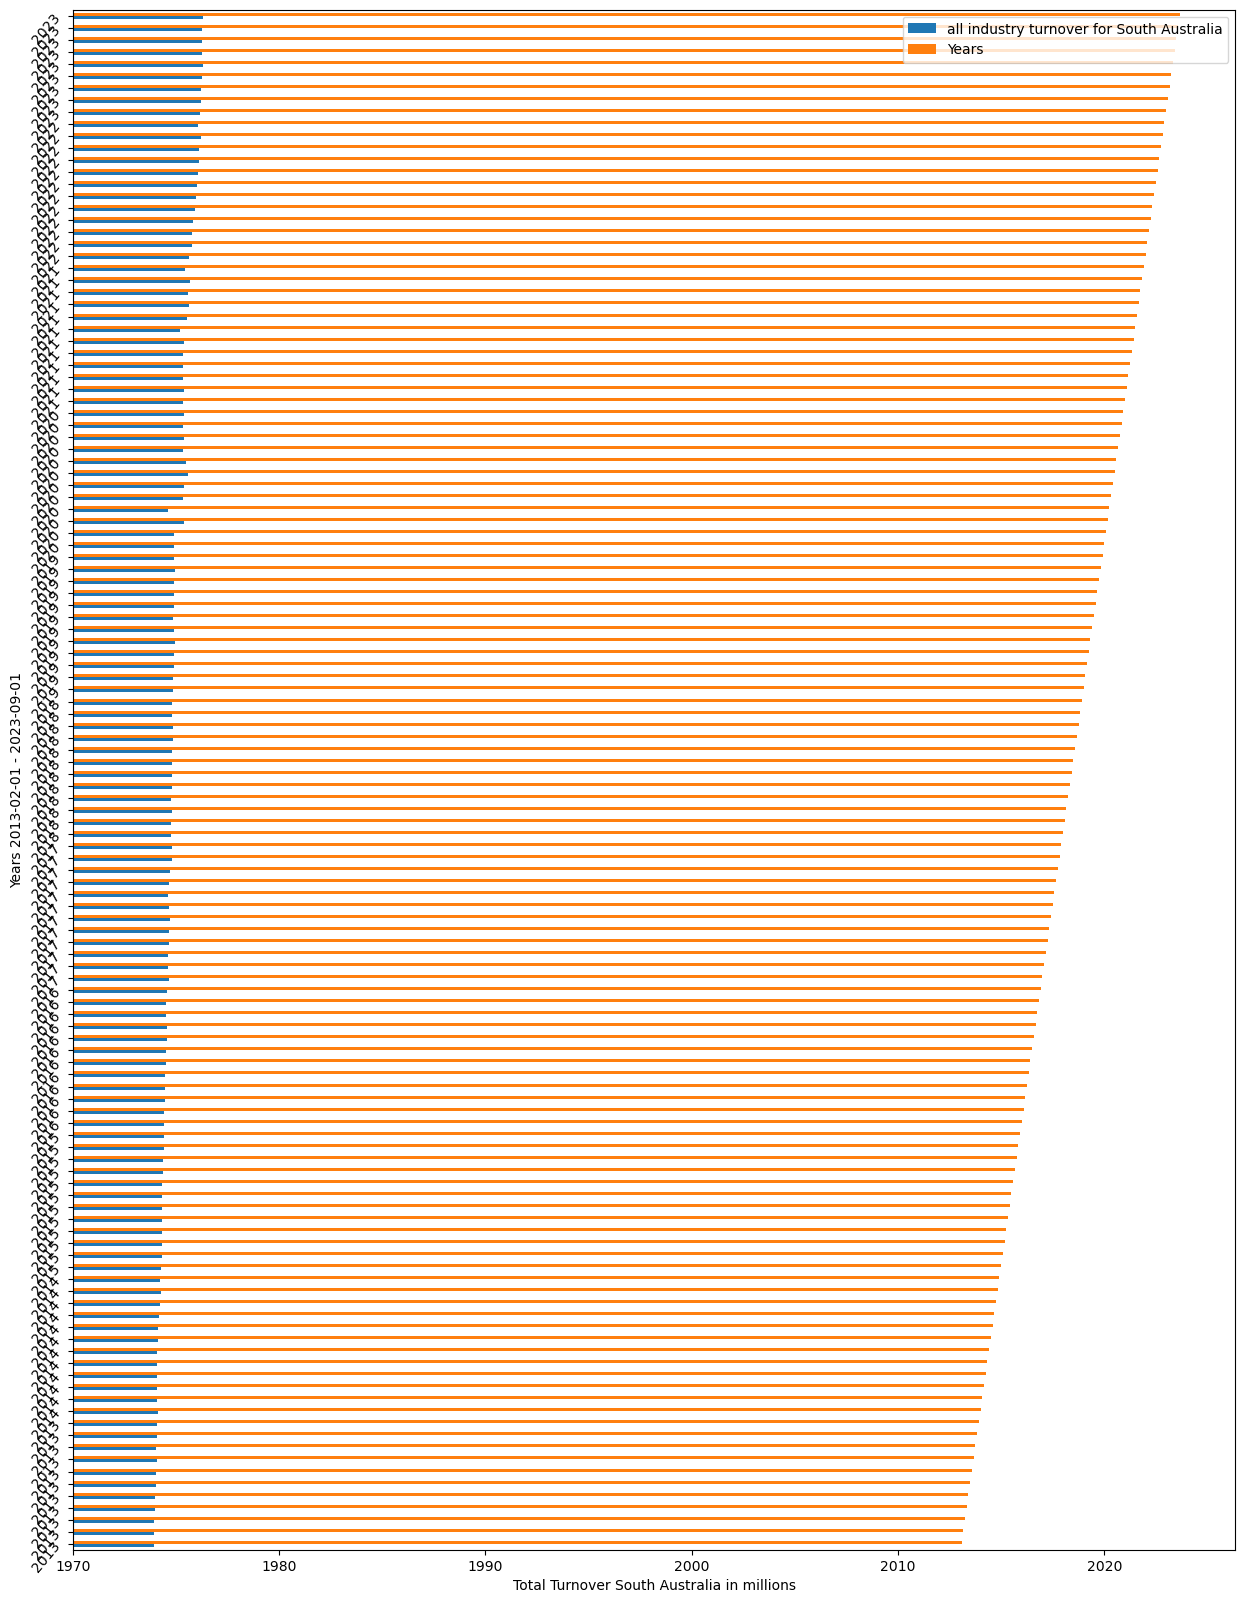

lowest turnover in years in all industry turnover for South Australia                   1431
Years                                        2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for South Australia                 2308.9
Years                                        2023-09-01 00:00:00
dtype: object


In [84]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  South Australia ;  Total (Industry) ;.1'].array
yaxis
year_SA = data_by_state_Q1data_seasonal["Month"].array
South_Australia_turnover_df= pd.DataFrame({"all industry turnover for South Australia":yaxis, "Years":year_SA}, index = Year_month)
lowestturnover_South_Australia = South_Australia_turnover_df.min()
highestturnover_South_Australia = South_Australia_turnover_df.max()
ax = South_Australia_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover South Australia in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_South_Australia}")
print(f"highest turnover in years in {highestturnover_South_Australia}")


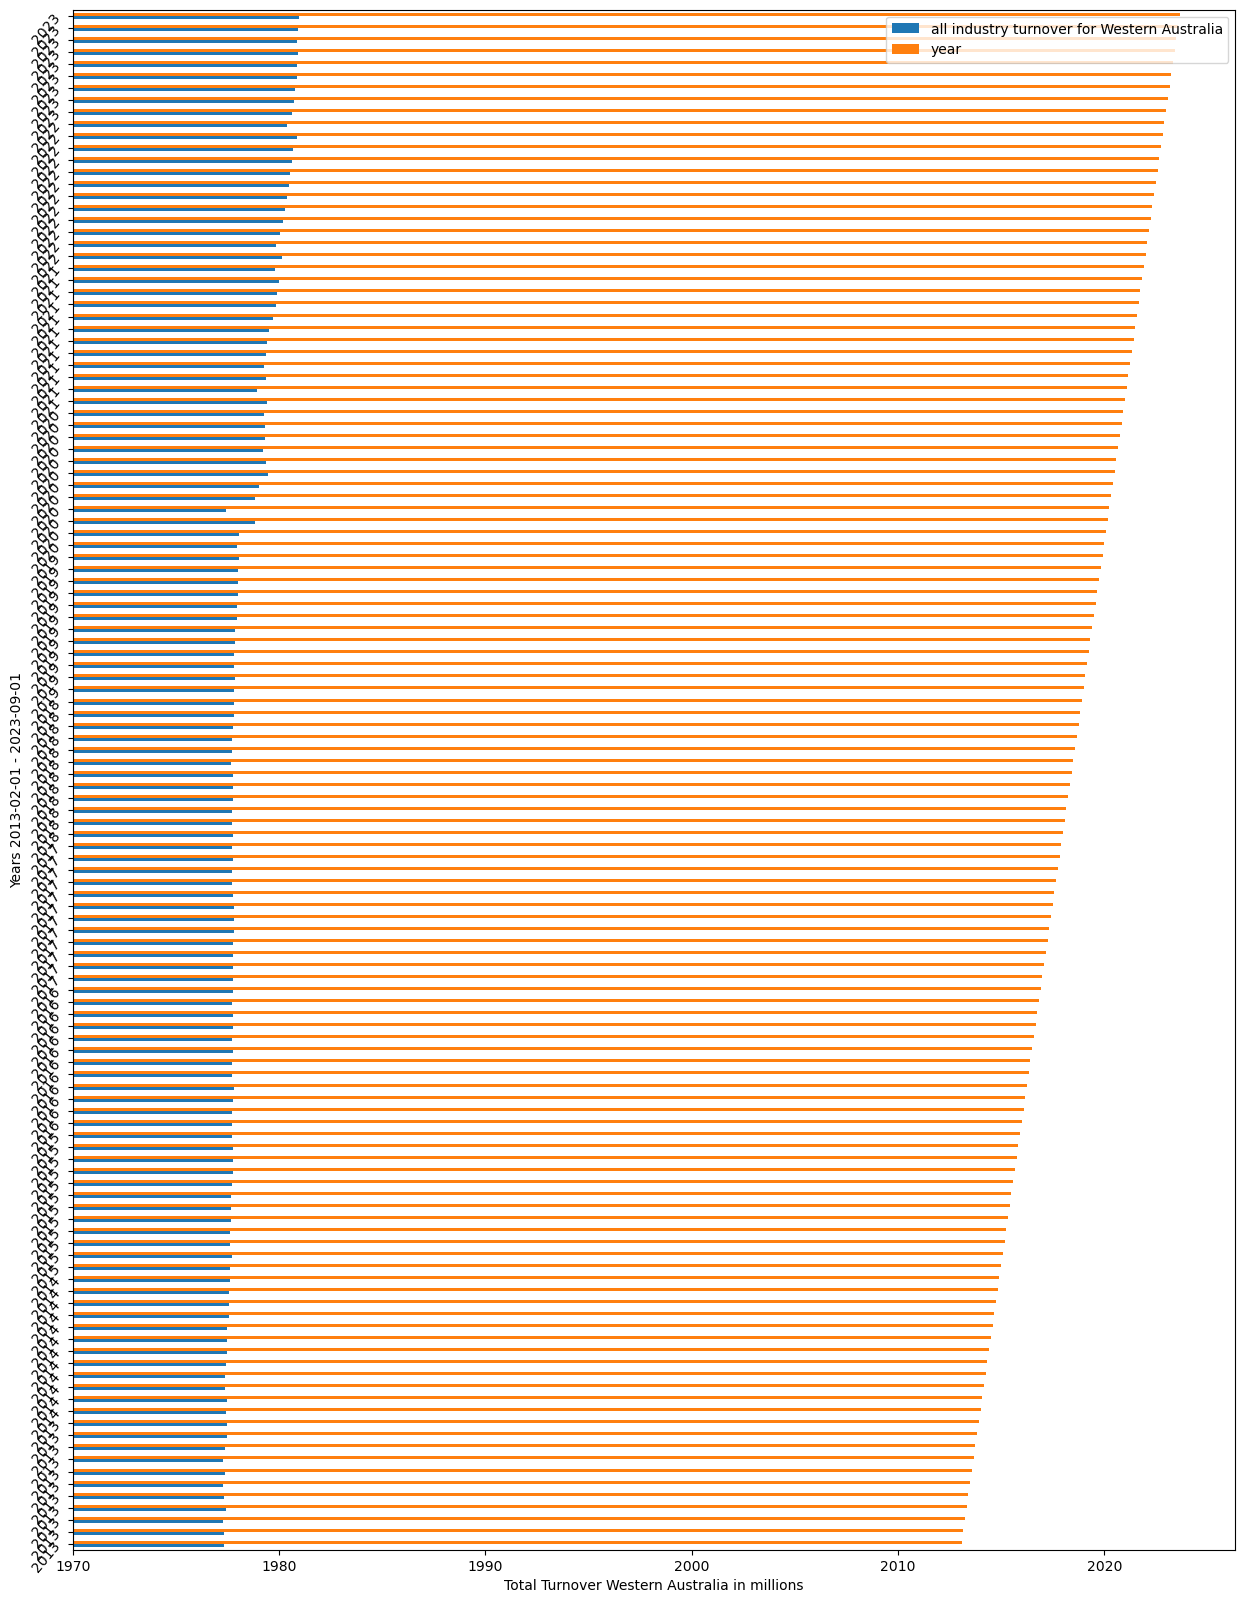

lowest turnover in years in all industry turnover for Western Australia                 2657.3
year                                           2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for Western Australia                   3999
year                                           2023-09-01 00:00:00
dtype: object


In [87]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Western Australia ;  Total (Industry) ;.1'].array
yaxis
year_WA = data_by_state_Q1data_seasonal["Month"].array
Western_Australia_turnover_df= pd.DataFrame({"all industry turnover for Western Australia":yaxis, "year": year_WA}, index = Year_month)
lowestturnover_Western_Australia = Western_Australia_turnover_df.min()
highestturnover_Western_Australia = Western_Australia_turnover_df.max()
ax = Western_Australia_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover Western Australia in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_Western_Australia}")
print(f"highest turnover in years in {highestturnover_Western_Australia}")

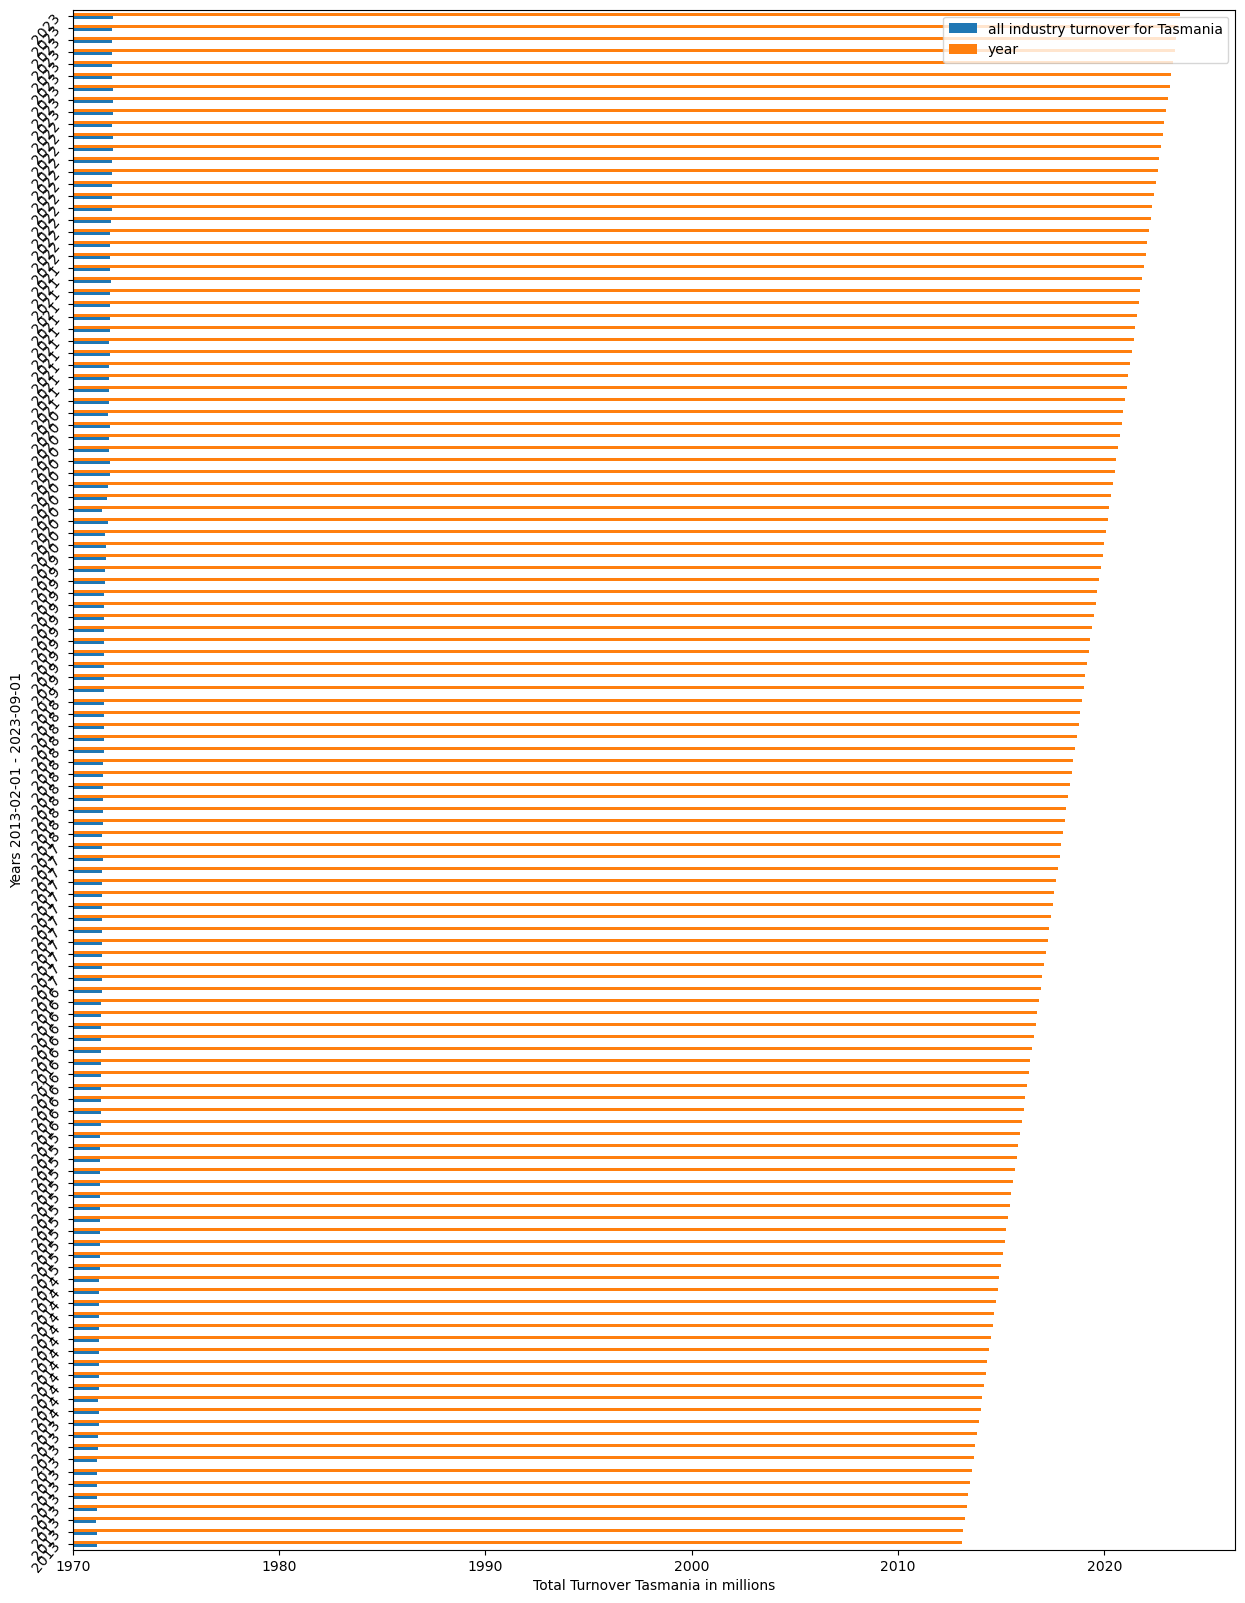

lowest turnover in years in all industry turnover for Tasmania                  417.6
year                                  2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for Tasmania                  716.6
year                                  2023-09-01 00:00:00
dtype: object


In [88]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Tasmania ;  Total (Industry) ;.1'].array
yaxis
year_Qld = data_by_state_Q1data_seasonal["Month"].array
Tasmania_turnover_df= pd.DataFrame({"all industry turnover for Tasmania":yaxis, "year":year_Qld}, index = Year_month)
lowestturnover_Tasmania = Tasmania_turnover_df.min()
highestturnover_Tasmania = Tasmania_turnover_df.max()
ax = Tasmania_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover Tasmania in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_Tasmania}")
print(f"highest turnover in years in {highestturnover_Tasmania}")

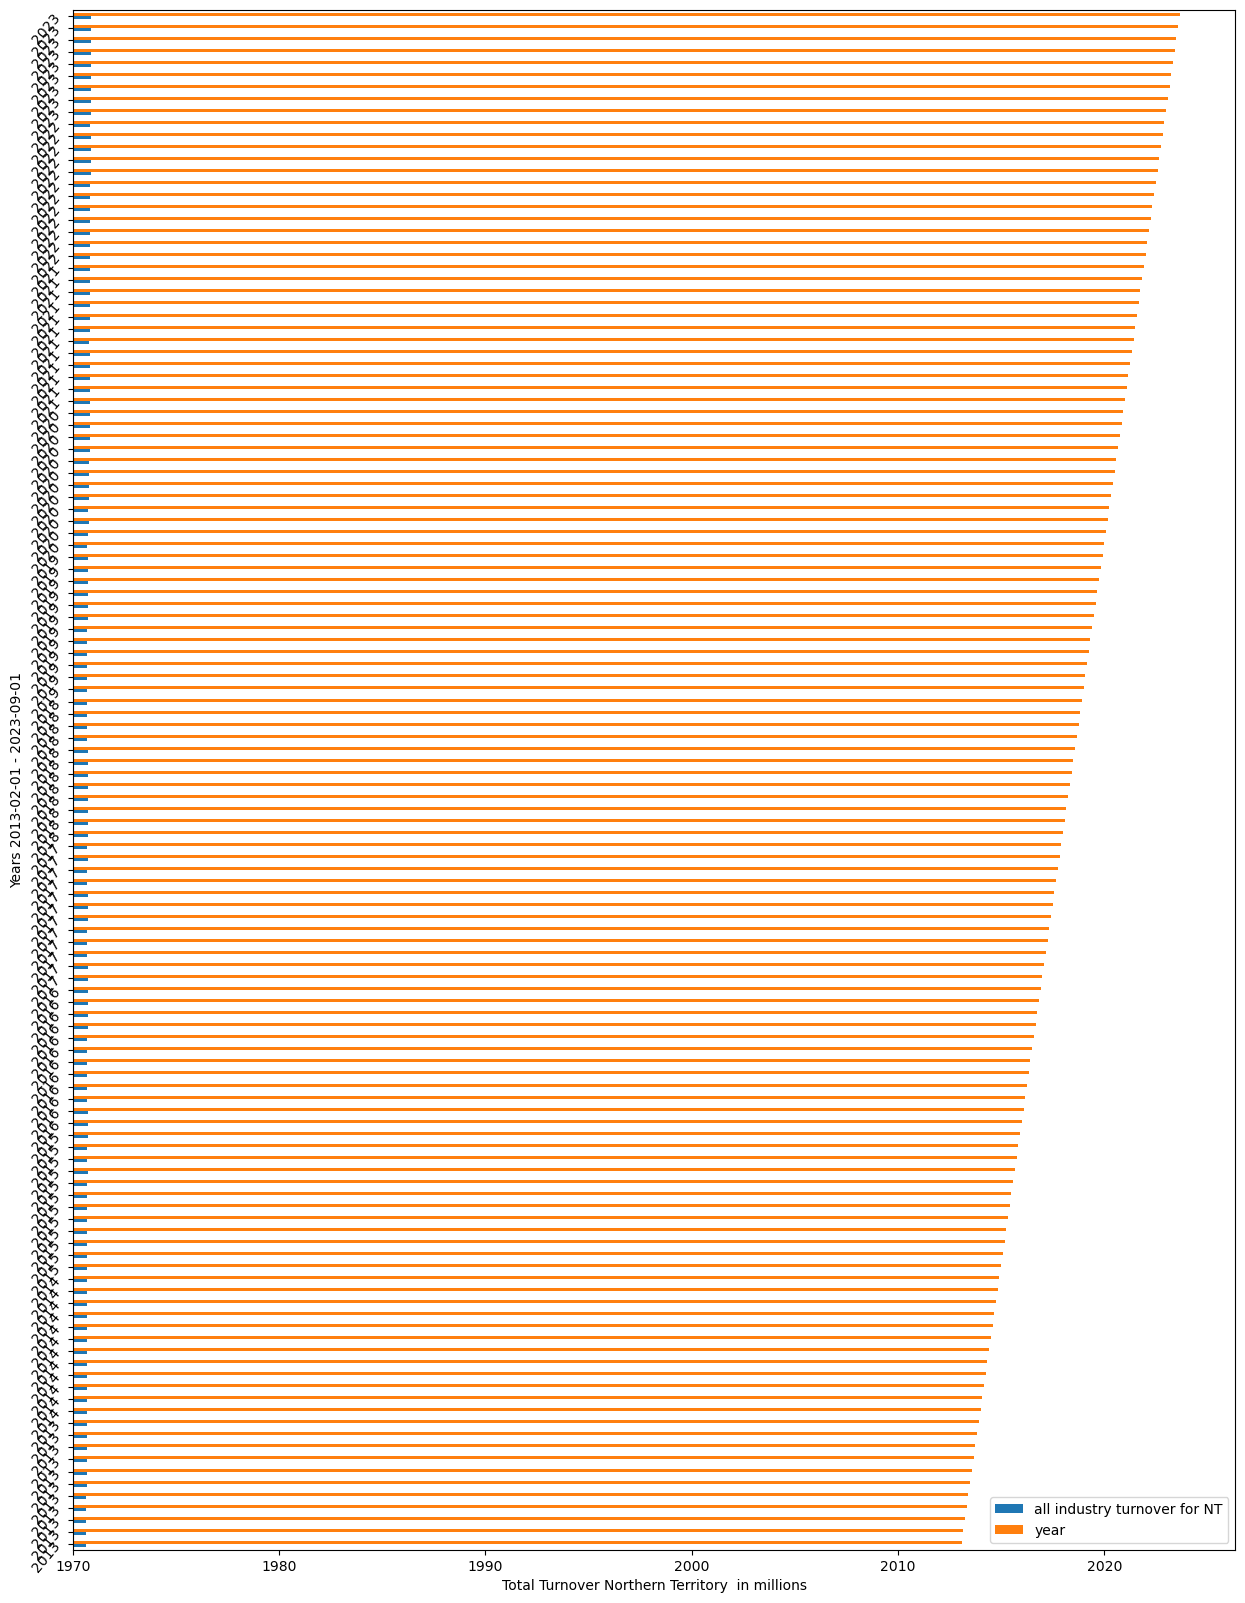

lowest turnover in years in all industry turnover for NT                  238.3
year                            2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for NT                  324.6
year                            2023-09-01 00:00:00
dtype: object


In [89]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Northern Territory ;  Total (Industry) ;.1'].array
yaxis
year_NT = data_by_state_Q1data_seasonal["Month"].array
Northern_Territory_turnover_df= pd.DataFrame({"all industry turnover for NT":yaxis,"year":year_NT }, index = Year_month)
lowestturnover_Northern_Territory = Northern_Territory_turnover_df.min()
highestturnover_Northern_Territory  = Northern_Territory_turnover_df.max()
ax = Northern_Territory_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover Northern Territory  in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_Northern_Territory }")
print(f"highest turnover in years in {highestturnover_Northern_Territory }")

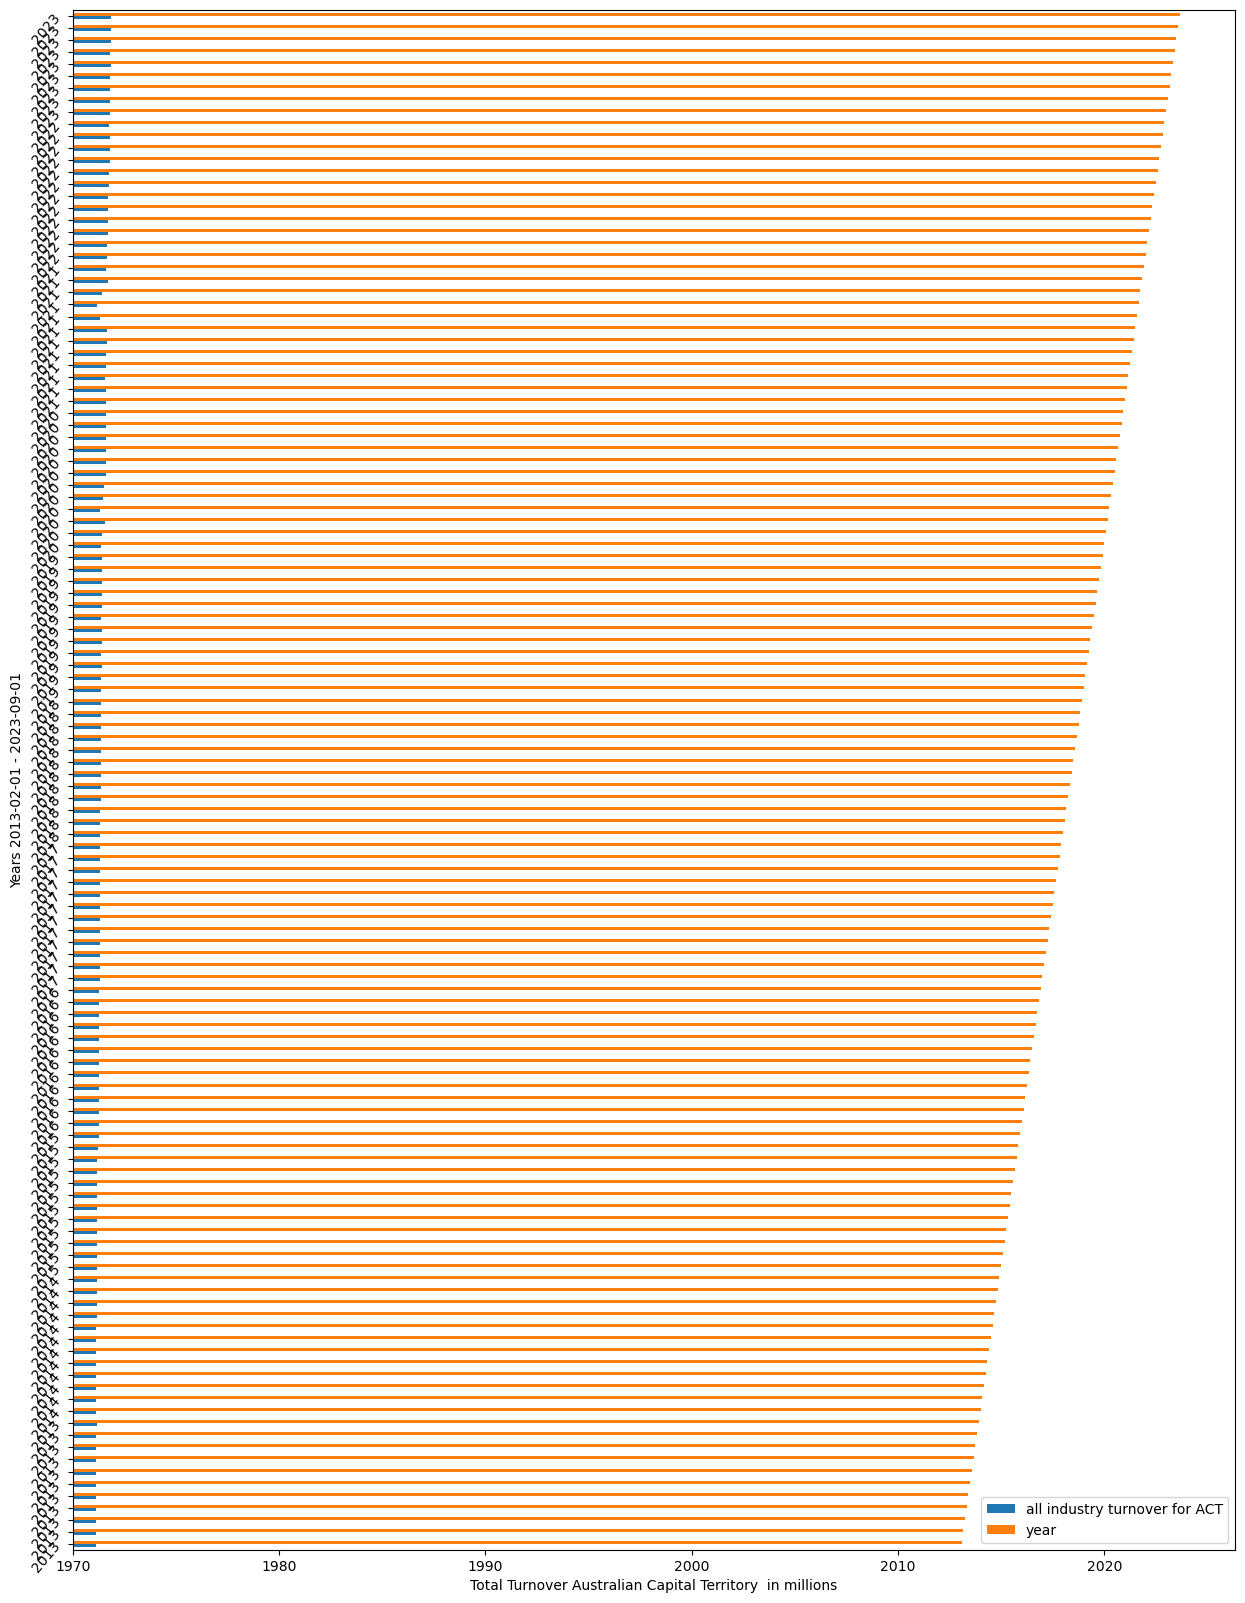

lowest turnover in years in all industry turnover for ACT                  404.9
year                             2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for ACT                  679.9
year                             2023-09-01 00:00:00
dtype: object


In [90]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Australian Capital Territory ;  Total (Industry) ;.1'].array
yaxis
year_ACT = data_by_state_Q1data_seasonal["Month"].array
ACT_turnover_df= pd.DataFrame({"all industry turnover for ACT":yaxis, "year":year_ACT }, index = Year_month)
lowestturnover_ACT = ACT_turnover_df.min()
highestturnover_ACT  = ACT_turnover_df.max()
ax = ACT_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover Australian Capital Territory  in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_ACT }")
print(f"highest turnover in years in {highestturnover_ACT }")

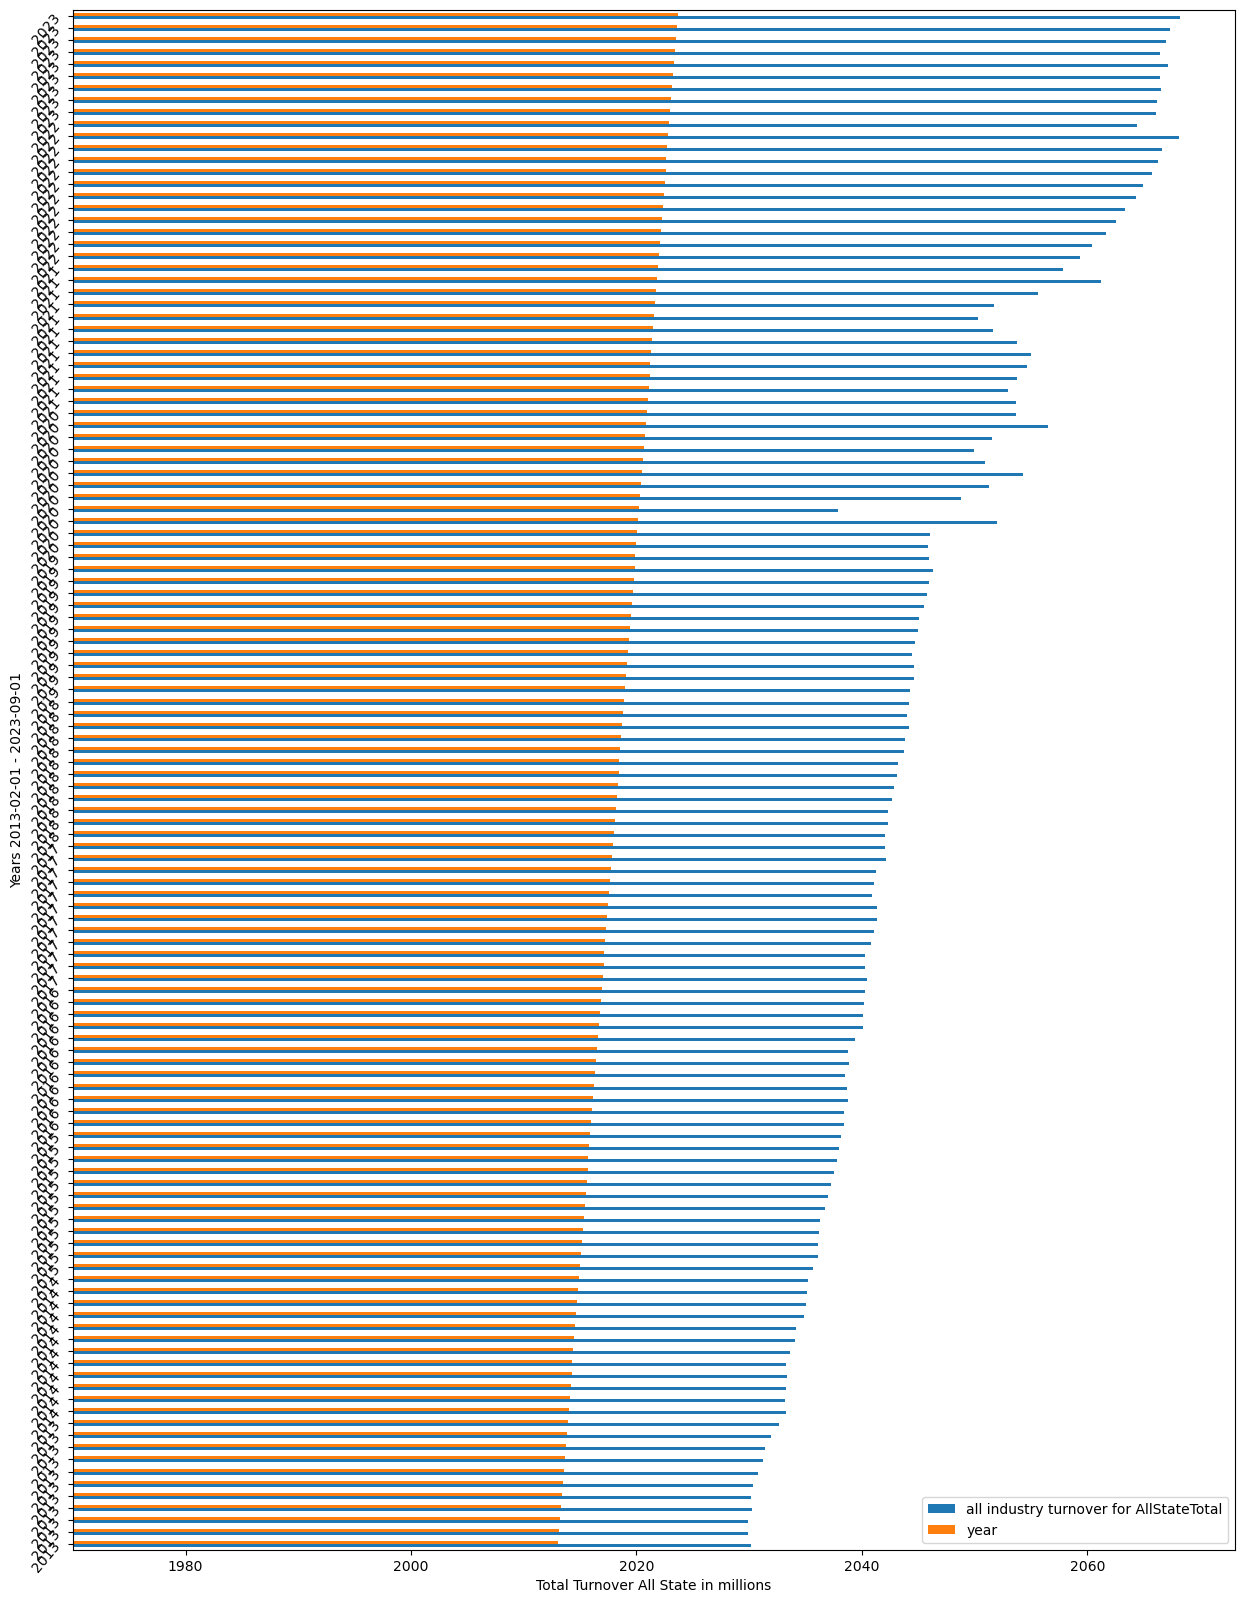

lowest turnover in years in all industry turnover for AllStateTotal                21861.9
year                                       2013-02-01 00:00:00
dtype: object
highest turnover in years in all industry turnover for AllStateTotal                35874.6
year                                       2023-09-01 00:00:00
dtype: object


In [91]:
yaxis = data_by_state_Q1data_seasonal['Turnover ;  Total (State) ;  Total (Industry) ;.1'].array
yaxis
year_allstate = data_by_state_Q1data_seasonal["Month"].array
AllStateTotal_turnover_df= pd.DataFrame({"all industry turnover for AllStateTotal":yaxis, "year":year_allstate }, index = Year_month)
lowestturnover_AllStates = AllStateTotal_turnover_df.min()
highestturnover_AllStates  = AllStateTotal_turnover_df.max()
ax = AllStateTotal_turnover_df.plot.barh(rot= 50, figsize=(15,20))
ax.set(xlabel = "Total Turnover All State in millions")
ax.set(ylabel = "Years 2013-02-01 - 2023-09-01")
plt.show()
print(f"lowest turnover in years in {lowestturnover_AllStates }")
print(f"highest turnover in years in {highestturnover_AllStates }")